In [40]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from librosa import core, feature, display
from IPython.display import Audio 

DEMO_AUDIO_PATH = '/Users/chris/Documents/Research/SpokenWebTutorials/detection_examples/voice_detection_4.wav'

In [36]:
Audio(filename=DEMO_AUDIO_PATH)

In [37]:
x_t, sr = lr.load(DEMO_AUDIO_PATH)

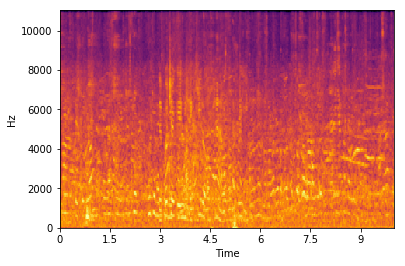

In [43]:
S_mel = lr.feature.melspectrogram(x_t, sr=sr)
lr.display.specshow(lr.power_to_db(S_mel), sr=sr, x_axis='time', y_axis='hz', cmap='inferno')


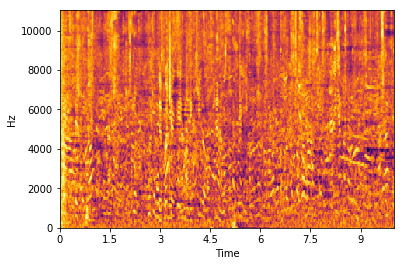

In [44]:
P_default = lr.core.pcen(S_mel, sr=sr)
lr.display.specshow(lr.power_to_db(P_default), sr=sr, x_axis='time', y_axis='hz', cmap='inferno')


In [76]:
tau_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
P_varying_tau = []
for tau in tau_values:
    PCEN_spec = lr.core.pcen(S_mel, sr=sr, time_constant = tau)
    P_varying_tau.append(PCEN_spec)
P_varying_tau = np.array(P_varying_tau)

In [77]:
P_varying_tau.shape

(10, 128, 431)

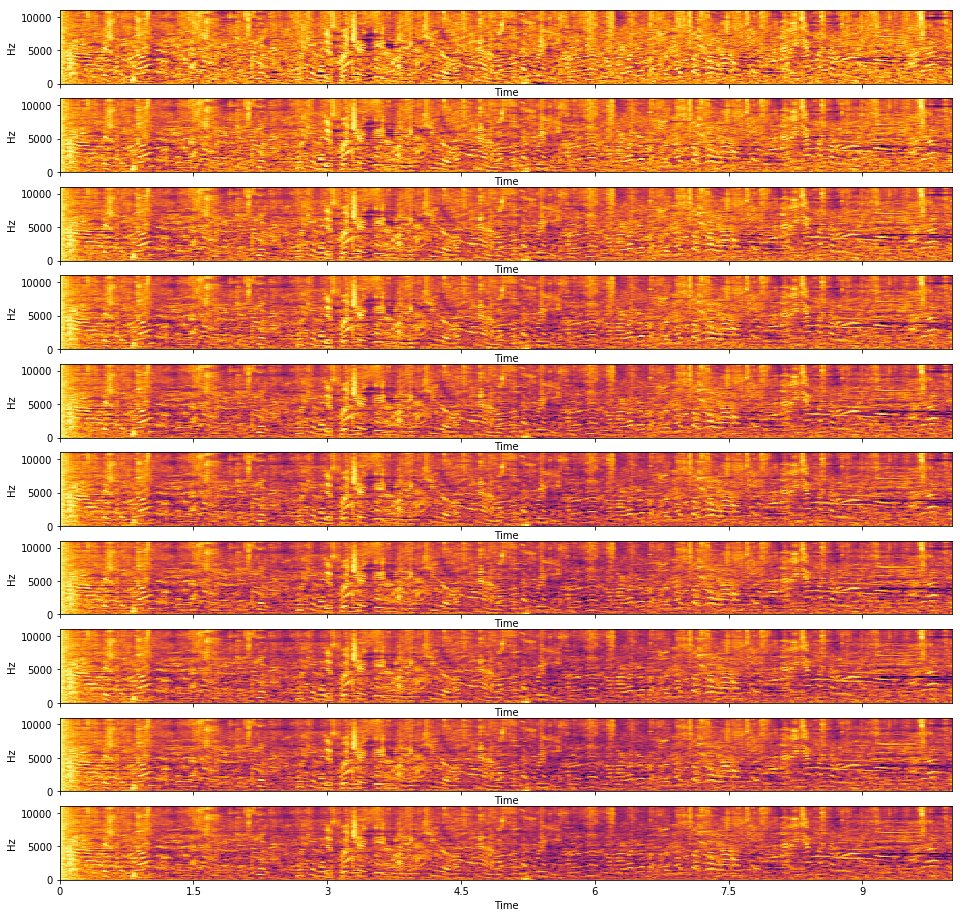

In [78]:
fig, ax = plt.subplots(nrows=10, sharex=True, figsize = (16,16))
for i, P in enumerate(P_varying_tau):
    lr.display.specshow(lr.power_to_db(P), sr=sr, x_axis='time',\
                        y_axis='hz', cmap='inferno', ax=ax[i])
